# CABXD plots on Muller potential
**Zilin Song, 20231227**

## Imports

In [2]:
import numpy as np, matplotlib.pyplot as plt, seaborn as sns, matplotlib
sns.set_style('ticks')
matplotlib.rcParams['font.family'] = ['serif']
matplotlib.rcParams['font.size'] = 8.

import sys, os
sys.dont_write_bytecode=True
sys.path.insert(0, os.path.join(os.getcwd(), '../..'))

from itertools import combinations

from pycospath.comm.twod import TwoDMullerBrownSystem

## Loaders: path evolution

In [3]:
evol_wkdir = './0_path_evolution'


def get_path_colvar(i_optim: int) -> np.ndarray:
  """Get the CAR constrained path colvar on the i_optim-th run."""
  return np.load(f'{evol_wkdir}/pathopt_{i_optim}/path_colvar.npy')


def get_path_replica_trajectory(i_optim: int, i_replica: int) -> np.ndarray:
  """Return the Replica trajectory at the i_optim-th optimization cycle and the i_replica-th Replica."""
  return np.load(f'{evol_wkdir}/pathopt_{i_optim}/sampler{i_replica}_traj.npz')['replica_coords']

## Path evolution

[[ 0.6234994   0.02803776]
 [ 0.46627869  0.05000786]
 [ 0.33376842  0.13742677]
 [ 0.22827673  0.25605453]
 [ 0.15050316  0.3944464 ]
 [ 0.00543678  0.45891953]
 [-0.15231994  0.47663553]
 [-0.3107036   0.48738979]
 [-0.46918736  0.49655156]
 [-0.62624053  0.51968899]
 [-0.77261579  0.58113265]
 [-0.89374789  0.68373895]
 [-0.98816093  0.81136033]
 [-0.980362    0.969917  ]
 [-0.89118439  1.10125014]
 [-0.78175945  1.2162598 ]
 [-0.67033872  1.32933703]
 [-0.55822363  1.44172584]]
[[ 0.6234994   0.02803776]
 [ 0.45869852  0.03398857]
 [ 0.30678852  0.09816098]
 [ 0.22539747  0.24158427]
 [ 0.14120576  0.38338166]
 [ 0.0122943   0.48622416]
 [-0.14819515  0.44830477]
 [-0.30523544  0.49863461]
 [-0.46767583  0.47021165]
 [-0.62302856  0.52553138]
 [-0.76789801  0.60431962]
 [-0.91097618  0.68631586]
 [-1.02953114  0.80094336]
 [-1.01238298  0.96495765]
 [-0.9091114   1.09352563]
 [-0.7879893   1.20543712]
 [-0.67756005  1.32791212]
 [-0.55822363  1.44172584]]


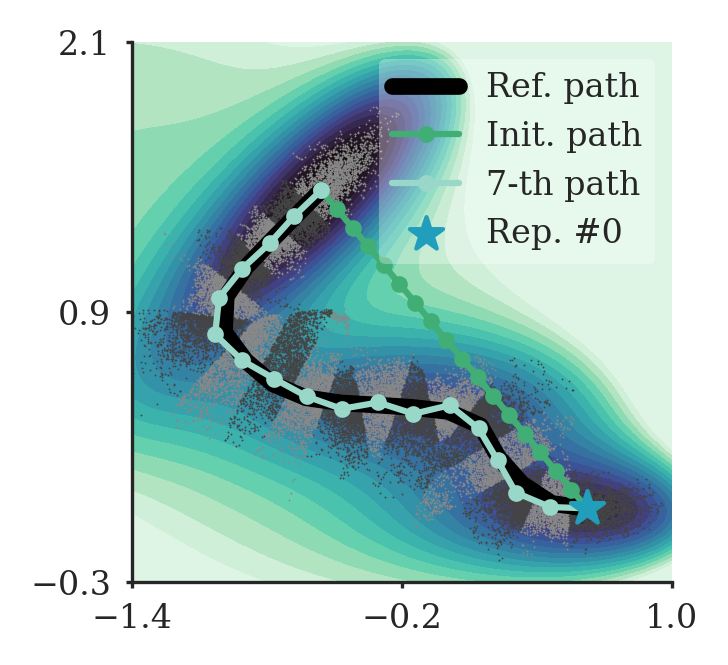

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(2.4, 2.4), dpi=300)

ax.set(xlim=(-1.4, 1.0), xticks=(-1.4, -.2, 1. ),
       ylim=(-0.3, 2.1), yticks=(- .3,  .9, 2.1), )

muller_pes = TwoDMullerBrownSystem().get_pes(ecut=50)
ax.contourf(muller_pes[0], muller_pes[1], muller_pes[2], 21, extend='both', cmap=sns.color_palette("mako", as_cmap=True))

for i_replica in range(18):
  replica_trajectory = get_path_replica_trajectory(i_optim=8, i_replica=i_replica)
  ax.scatter(replica_trajectory[:, 0], replica_trajectory[:, 1], s=.2, linewidths=0., c='#444444' if i_replica % 2 == 0 else '#888888')

path_colvar = np.load(f'{evol_wkdir}/pathopt_0/path_colvar_exact.npy')
print(path_colvar)
ax.plot(path_colvar[:, 0], path_colvar[:, 1], c="#000000", label='Ref. path', lw=4.)

path_colvar = get_path_colvar(i_optim=0)
ax.plot(path_colvar[:, 0], path_colvar[:, 1], c="#41ae76", marker='.', label='Init. path')

path_colvar = get_path_colvar(i_optim=7)
ax.plot(path_colvar[:, 0], path_colvar[:, 1], c="#99d8c9", marker='.', label='7-th path')
print(path_colvar)

path_colvar = get_path_colvar(i_optim=0)
ax.scatter([path_colvar[0, 0], ], [path_colvar[0, 1], ], c="#219ebc", marker='*', s=70, zorder=11, label='Rep. #0', )

ax.set_aspect('equal', adjustable='box')
ax.tick_params(length=1.5)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), framealpha=0.3).get_frame().set_linewidth(0.)
sns.despine()
plt.subplots_adjust(left=.5/2.4, right=2.3/2.4, top=2.2/2.4, bottom=.4/2.4)
plt.savefig('./figures/muller_path_evolution.png')

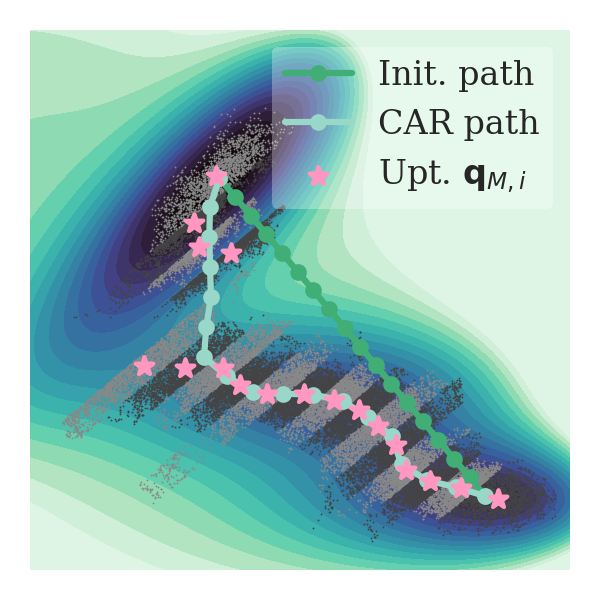

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(1.8, 1.8), dpi=300)

ax.set(xlim=(-1.4, 1.0), xticks=(-1.4, -.2, 1. ),
       ylim=(-0.3, 2.1), yticks=(- .3,  .9, 2.1), )

muller_pes = TwoDMullerBrownSystem().get_pes(ecut=50)
ax.contourf(muller_pes[0], muller_pes[1], muller_pes[2], 21, extend='both', cmap=sns.color_palette("mako", as_cmap=True))

mean_coord = np.zeros((18, 2))

for i_replica in range(18):
  replica_trajectory = get_path_replica_trajectory(i_optim=1, i_replica=i_replica)
  ax.scatter(replica_trajectory[:, 0], replica_trajectory[:, 1], s=.2, linewidths=0., c='#444444' if i_replica % 2 == 0 else '#888888')
  mean_coord[i_replica, 0] = np.mean(replica_trajectory[:, 0])
  mean_coord[i_replica, 1] = np.mean(replica_trajectory[:, 1])

path_colvar = get_path_colvar(i_optim=0)
ax.plot(path_colvar[:, 0], path_colvar[:, 1], c="#41ae76", marker='.', label='Init. path')

path_colvar = get_path_colvar(i_optim=1)
ax.plot(path_colvar[:, 0], path_colvar[:, 1], c="#99d8c9", marker='.', label='CAR path')

path_colvar = get_path_colvar(i_optim=0)
ax.scatter(mean_coord[:, 0], mean_coord[:, 1], c="#ff97c1", marker='*', s=20, zorder=11, label=r'Upt. $\mathbf{q}_{M,i}$', )

ax.set_aspect('equal', adjustable='box')
plt.axis('off')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), framealpha=0.3).get_frame().set_linewidth(0.)
sns.despine()
plt.subplots_adjust(left=0./1.8, right=1.8/1.8, top=1.8/1.8, bottom=0./1.8)
plt.savefig('./figures/mptp_opt.jpg')

## Path evolution convergence

0.000, 0.034, 0.050, 0.090, 0.114, 0.125, 0.144, 0.169, 0.194, 0.218, 0.250, 0.270, 0.373, 0.389, 0.297, 0.182, 0.072, 0.000
0.000, 0.002, 0.027, 0.026, 0.096, 0.043, 0.046, 0.025, 0.085, 0.063, 0.090, 0.069, 0.091, 0.049, 0.027, 0.043, 0.013, 0.000
0.000, 0.026, 0.060, 0.051, 0.018, 0.021, 0.042, 0.011, 0.007, 0.010, 0.086, 0.029, 0.058, 0.017, 0.009, 0.010, 0.001, 0.000
0.000, 0.008, 0.021, 0.018, 0.067, 0.024, 0.024, 0.027, 0.012, 0.081, 0.105, 0.072, 0.024, 0.024, 0.022, 0.005, 0.003, 0.000
0.000, 0.010, 0.016, 0.012, 0.045, 0.009, 0.034, 0.048, 0.032, 0.032, 0.074, 0.036, 0.071, 0.010, 0.019, 0.008, 0.001, 0.000
0.000, 0.013, 0.024, 0.024, 0.028, 0.047, 0.042, 0.039, 0.041, 0.050, 0.068, 0.043, 0.022, 0.014, 0.013, 0.005, 0.001, 0.000
0.000, 0.018, 0.048, 0.015, 0.014, 0.028, 0.029, 0.013, 0.026, 0.007, 0.024, 0.017, 0.043, 0.032, 0.020, 0.012, 0.007, 0.000
[0.16496887 0.04418087 0.02534577 0.02974595 0.02548975 0.02640785
 0.01957895]


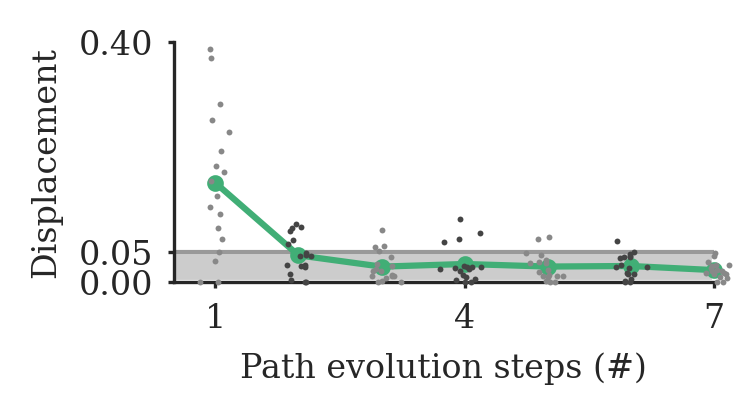

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(2.4, 1.4), dpi=300)

ax.set(xlim=( .5, 7  ), xticks=[1, 4, 7],     xlabel=r'Path evolution steps (#)', 
       ylim=(0. ,  .4), yticks=[0., .05, .4], ylabel=r'Displacement', )
# ax.ticklabel_format(style='sci', scilimits=(-2,-2), axis='y')

replica_disp = np.asarray([np.linalg.norm(get_path_colvar(i_optim=i_optim)-np.load(f'{evol_wkdir}/pathopt_0/path_colvar_exact.npy'), axis=1) for i_optim in range(1, 8)])
replica_mean = np.mean(replica_disp, axis=1)

from matplotlib.patches import Rectangle
ax.add_patch(Rectangle((0, 0), 7, .05, facecolor='#cccccc'))
ax.plot([.5, 7], [.05 , .05 ], '#999999', clip_on=True, lw=1, zorder=1)
ax.plot(np.arange(7)+1, replica_mean, "#41ae76", clip_on=False, marker='.')

for i_optim in range(1, 8):
  ax.scatter(np.repeat([i_optim], 18)+np.random.normal(scale=.1, size=18), replica_disp[i_optim-1, :], 
             s=2., linewidths=0., c='#444444' if i_optim % 2 == 0 else '#888888', zorder=99, clip_on=False)

ax.tick_params(length=1.5)
sns.despine()
plt.subplots_adjust(left=.5/2.4, right=2.3/2.4, top=1.2/1.4, bottom=.4/1.4)
plt.savefig('./figures/muller_path_evolution_convergence.png')

for i in range(replica_disp.shape[0]): print(', '.join([str(f'{r:.3f}') for r in replica_disp[i]]))
print(replica_mean)

## Loaders: CABXD

In [7]:
cabxd_wkdir = './1_path_boxedmd/bxd_statistics'
cabxd_kt = 10.

def get_cabxd_voronoi_reflection(i_run: int, i_replica: int) -> np.ndarray:
  """CABXD: get the Voronoi penetration statistics."""
  return np.load(f'{cabxd_wkdir}/run{str(i_run)}_sampler{str(i_replica)}_voronoi_reflection.npz')


def compute_cabxd_transition_kernel(i_run:        int, 
                                    num_replicas: int, 
                                    before_steps: int, 
                                    dycorr_steps: int, 
                                    timestepsize: float, 
                                    ) -> np.ndarray:
  """CABXD: compute the transition kernel from the Voronoi penetration statistics."""
  transition_kernel = np.zeros((num_replicas, num_replicas))
  for i_replica in range(num_replicas):
    voronoi_tape = get_cabxd_voronoi_reflection(i_run=i_run, i_replica=i_replica)
    step_index, cell_index = voronoi_tape['step_index'], voronoi_tape['cell_index']
    step_index, cell_index = step_index[step_index<before_steps], cell_index[step_index<before_steps]
    transition_steps = np.copy(step_index[1:  ]-step_index[0:-1])
    transition_cells = np.copy(cell_index[1:  ]                 )
    dycorr_transition_steps = transition_steps[transition_steps>dycorr_steps]
    dycorr_transition_cells = transition_cells[transition_steps>dycorr_steps]

    for j_to_replica in range(num_replicas):
      if np.abs(j_to_replica-i_replica) > 3: # Reflective boundaries to prebent box-to-far-away-box tunneling.
        transition_kernel[i_replica, j_to_replica] = 0
      else:
        i_to_j_hits = dycorr_transition_cells[dycorr_transition_cells == j_to_replica].shape[0]
        transition_kernel[i_replica, j_to_replica] = i_to_j_hits if i_to_j_hits > 0 else 0 # discard the first hit.

    transition_kernel[i_replica, :] = transition_kernel[i_replica, :] / (10_000_000 * float(timestepsize))
  # (np.sum(dycorr_transition_steps) * float(timestepsize))
  
  return transition_kernel


def compute_cabxd_stationary_distribution(num_replicas: int, transition_kernel: np.ndarray) -> np.ndarray:
  """CABXD: compute the stationary distribution from the MC kernel."""
  P = np.copy(transition_kernel)
  Q = P - np.identity(num_replicas)*np.sum(P, axis=1)

  Q1 = np.concatenate((Q.T, np.ones((num_replicas, ))[np.newaxis, :]), axis=0)
  y1 = np.concatenate((np.zeros((num_replicas, )), [1]))
  
  Q_, R_ = np.linalg.qr(Q1)
  y = Q_.T @ y1

  return np.linalg.solve(R_, y)


def compute_cabxd_mean_first_passage_time(to_replica: int, 
                                          num_replicas:int, 
                                          transition_kernel: np.ndarray, 
                                          ) -> np.ndarray:
  """CABXD: compute the mean first passage time to the to_replica-th replica from the MC kernel."""
  P = np.copy(transition_kernel)
  Q = P - np.identity(num_replicas)*np.sum(P, axis=1)

  # Remove to_replica rows and cols.
  idx = np.arange(num_replicas)
  Qhat = Q[idx!=to_replica, :][:, idx!=to_replica]

  # Solve for MFPTs
  mfpts = np.zeros((num_replicas, ))
  mfpts_to_replica = np.linalg.solve(Qhat, -np.ones((num_replicas-1, )))

  mfpts[idx!=to_replica] = mfpts_to_replica
  
  return mfpts

## CABXD free energy profile

[ 6.21724894e-16  8.20652641e-01  1.92383893e+00  2.89416127e+00
  2.92174498e+00  2.87575990e+00  2.86359230e+00  3.46461086e+00
  4.38986652e+00  5.38897291e+00  6.09780451e+00  5.35948353e+00
  3.61562755e+00  1.95952445e+00 -7.22132202e-03 -1.81545943e+00
 -3.08774121e+00 -4.07504500e+00] 

 [0.02619864 0.025179   0.02728749 0.02235382 0.02510608 0.02383111
 0.02062733 0.02414009 0.02116797 0.02301804 0.0254113  0.02440668
 0.01355388 0.01267614 0.01483966 0.00696111 0.00182127 0.00147903]


 [ 0.          0.40136053  1.6006935   3.08908314  3.01971517  2.70982437
  2.75462238  3.21241918  4.10955308  5.21429163  6.3586001   5.17154218
  3.47887002  1.54199338 -0.49372595 -2.28269301 -3.46708781 -3.85062232]


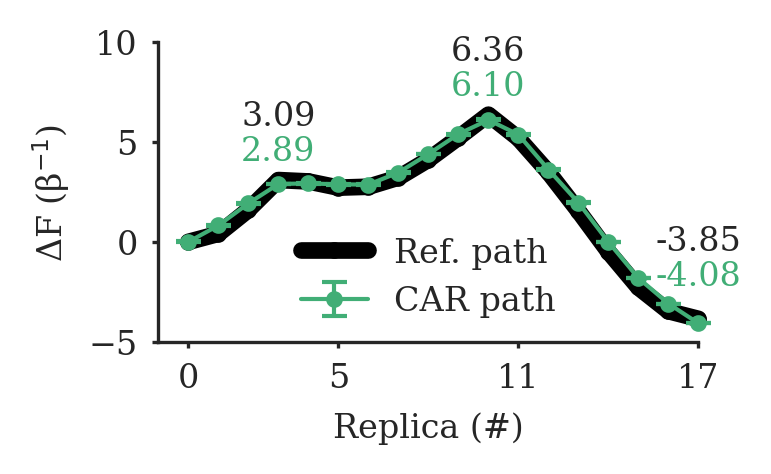

In [8]:
num_runs, num_replicas, before_steps, dycorr_steps, timestepsize = 5, 18, np.inf, 0, 0.0001
batch_idx = np.asarray(list(combinations(range(num_runs), 3)))

bxd_transmats = np.zeros((num_runs, num_replicas, num_replicas))
bxd_fes = np.zeros((batch_idx.shape[0], num_replicas))

for i_run in range(num_runs):
  bxd_transmats[i_run, :, :] = compute_cabxd_transition_kernel(i_run=i_run, 
                                                               num_replicas=num_replicas, 
                                                               before_steps=before_steps, 
                                                               dycorr_steps=dycorr_steps, 
                                                               timestepsize=timestepsize, )

for i_trial in range(batch_idx.shape[0]):
  bxd_fes[i_trial, :] = compute_cabxd_stationary_distribution(num_replicas=num_replicas, 
                                                              transition_kernel=np.mean(bxd_transmats[batch_idx[i_trial], :, :], axis=0), )

bxd_fes = -np.log(np.abs(bxd_fes))
bxd_fes -= np.mean(bxd_fes, axis=0)[0]

fe_mean = np.mean(bxd_fes, axis=0)
fe_95ci = np.std (bxd_fes, axis=0)/np.sqrt(10)*1.96
print(fe_mean, '\n\n', fe_95ci)

fe_ref = np.load('../../examples/mb_twod/fe/fe_bxd.npy')
fe_ref -= fe_ref[0]
print('\n\n', fe_ref)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(2.5, 1.6), dpi=300)

ax.plot(np.arange(18), fe_ref, c="#000000", marker='.', label='Ref. path', lw=4., clip_on=False)
ax.errorbar(x=np.arange(18), y= fe_mean, yerr=np.asarray([fe_95ci]), 
            c='#41ae76', marker='.', label='CAR path', lw=1., capsize=3., ecolor='#41ae76', clip_on=False)

ax.text( 3., 5.50, f'{fe_ref [ 3]:.2f}', ha='center', va='bottom')
ax.text( 3., 3.75, f'{fe_mean[ 3]:.2f}', ha='center', va='bottom', c="#41ae76")
ax.text(10., 8.75, f'{fe_ref [10]:.2f}', ha='center', va='bottom')
ax.text(10., 7.00, f'{fe_mean[10]:.2f}', ha='center', va='bottom', c="#41ae76")
ax.text(17, -0.75, f'{fe_ref [17]:.2f}', ha='center', va='bottom')
ax.text(17, -2.50, f'{fe_mean[17]:.2f}', ha='center', va='bottom', c="#41ae76")

ax.set(xlim=(-1, 17), xticks=[0, 5, 11, 17],  xlabel=r'Replica (#)', 
       ylim=(-5, 10), yticks=[-5., 0., 5, 10], ylabel=r'ΔF (β$^{-1}$)')

ax.tick_params(length=1.5)
sns.despine()
plt.subplots_adjust(left=.5/2.5, right=2.3/2.5, top=1.4/1.6, bottom=.4/1.6)
plt.legend(loc='upper center', bbox_to_anchor=(.5, .45), framealpha=0.3).get_frame().set_linewidth(0.)
plt.savefig('./figures/muller_free_energies.png')

## CABXD end-to-end MFPTs

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


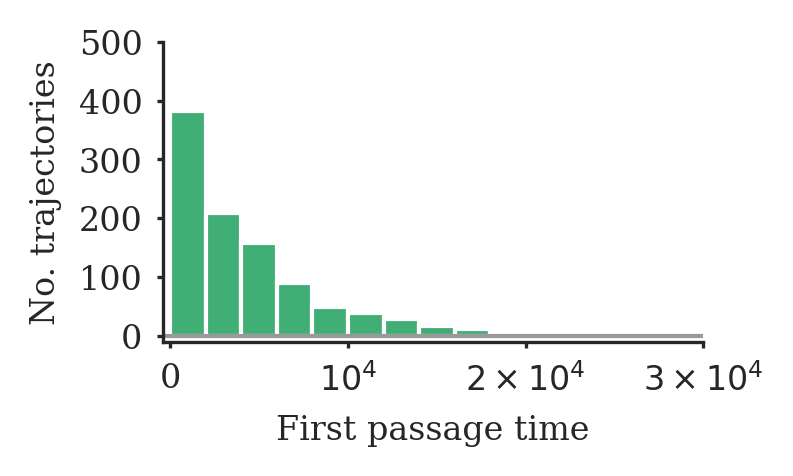

In [72]:
def compute_ref_fpts():
  fpts = []
  with open('./2_path_refmfpt/mfpt_ref.log', 'r') as fi:
    for line in fi.readlines():
      fpts.append(int(line.split(':')[-2].strip()))
  return np.asarray(fpts) * .0001
ref_fpts = compute_ref_fpts()
np.max(ref_fpts), np.min(ref_fpts)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(2.5, 1.6), dpi=300)

ax.hist(x=ref_fpts, bins=20, range=(0, 40000), color='#41ae76')

ax.set(xlim=(-400, 30000), xticks=[0, 10000, 20000, 30000], 
       xticklabels=[r'0', r'$10^4$', r'$2 \times 10^4$', r'$3 \times 10^4$'], xlabel=r'First passage time', 
       ylim=(-10, 500), yticks=[0, 100, 200, 300, 400, 500], ylabel=r'No. trajectories')
# ax.text(5000, 430, f'MFPT', ha='left', va='bottom')
# ax.plot([4388.42, 4388.42], [0 , 500 ], '#99d8c9', clip_on=True, lw=1, zorder=1)
ax.plot([-400, 30000], [0 , 0 ], '#999999', clip_on=True, lw=1, zorder=1)

ax.tick_params(length=1.5)
sns.despine()
plt.subplots_adjust(left=.5/2.5, right=2.3/2.5, top=1.4/1.6, bottom=.4/1.6)
plt.legend(loc='upper center', bbox_to_anchor=(.5, .45), framealpha=0.3).get_frame().set_linewidth(0.)
plt.savefig('./figures/muller_ref_fpts.png')